# K-Means Clustering

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Datasets/Mall_Customers.csv')
X = dataset.iloc[:, [2,3,4]].values

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
#Mencoba Cluster Manual
from sklearn.cluster import KMeans

kmeans1 = KMeans(n_clusters = 1, init = 'k-means++', random_state = 42)
kmeans1.fit(X)
print ("WCSS Klaster 1:", kmeans1.inertia_)

kmeans2 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans2.fit(X)
print ("WCSS Klaster 2:", kmeans2.inertia_)

kmeans3 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans3.fit(X)
print ("WCSS Klaster 3:", kmeans3.inertia_)

kmeans4 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans4.fit(X)
print ("WCSS Klaster 4:", kmeans4.inertia_)

WCSS Klaster 1: 308812.7800000001
WCSS Klaster 2: 221087.1962719298
WCSS Klaster 3: 158744.97108013942
WCSS Klaster 4: 104366.151455562


## `Elbow Method`

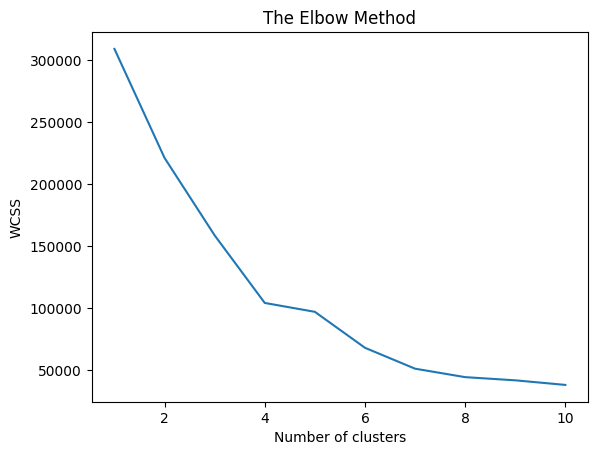

In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [10]:
kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5
 2 5 2 0 2 5 2 5 2 0 6 6 6 0 6 6 0 0 0 0 0 6 0 0 6 0 0 0 6 0 0 6 6 0 0 0 0
 0 6 0 6 6 0 0 6 0 0 6 0 0 6 6 0 0 6 0 6 6 6 0 6 0 6 6 0 0 6 0 6 0 0 0 0 0
 6 6 6 6 6 0 0 0 0 6 6 6 4 6 4 6 4 3 4 3 4 6 4 3 4 3 4 3 4 3 4 6 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


## Visualising the clusters

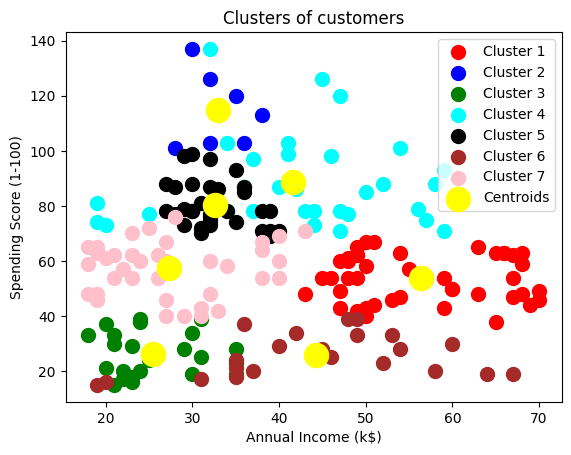

In [13]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'black', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'brown', label = 'Cluster 6')
plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], s = 100, c = 'pink', label = 'Cluster 7')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [14]:
dataset['Cluster'] = y_kmeans
print(dataset.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        5  
1        2  
2        5  
3        2  
4        5  


In [24]:
cluster_characteristics = dataset.groupby('Cluster').agg(
    Age_Mean=('Age', 'mean'),
    AnnualIncome_Mean=('Annual Income (k$)', 'mean'),
    SpendingScore_Mean=('Spending Score (1-100)', 'mean'),
    Count=('CustomerID', 'count')
)
cluster_characteristics

,Age_Mean,AnnualIncome_Mean,SpendingScore_Mean,Count
Cluster,,,,
0,56.340909,53.704545,49.386364,44
1,33.000000,114.714286,78.428571,7
2,25.521739,26.304348,78.565217,23
3,41.647059,88.735294,16.764706,34
4,32.625000,80.375000,82.937500,32
5,44.318182,25.772727,20.272727,22
6,27.315789,57.500000,48.447368,38


##`Metode Silhouette`

In [25]:
from sklearn.metrics import silhouette_score

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans_2_clusters = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans_2_clusters.fit(X)
silhouette_score_2 = silhouette_score(X, kmeans_2_clusters.labels_)

print(f"Silhouette Score for 2 clusters: {silhouette_score_2}")

Silhouette Score for 2 clusters: 0.3319705845155097


In [26]:
silhouette_scores = []
for i in range(2, 11): # Silhouette score is not defined for a single cluster
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

print(silhouette_scores)

[np.float64(0.3319705845155097), np.float64(0.335580238662684), np.float64(0.40546302077733304), np.float64(0.3575963460506624), np.float64(0.4155672337697055), np.float64(0.4420336177238127), np.float64(0.43280878015743623), np.float64(0.4092704336279867), np.float64(0.39682188832916687)]


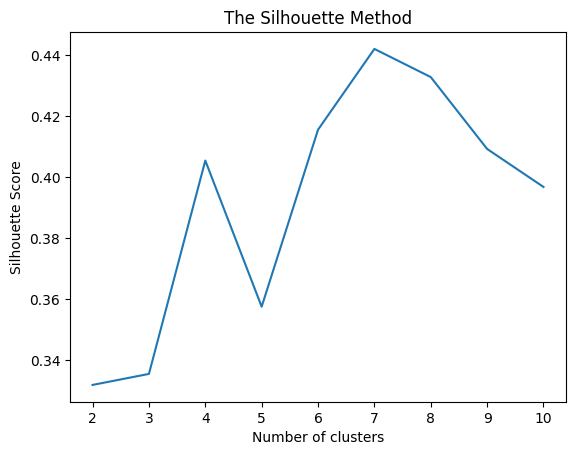

In [27]:
plt.plot(range(2, 11), silhouette_scores)
plt.title('The Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

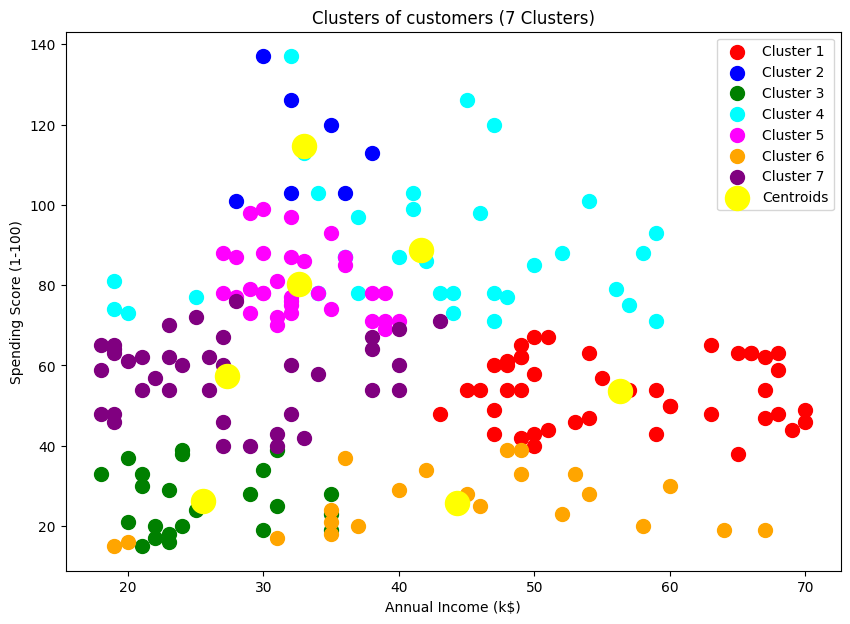

In [ ]:
kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
y_kmeans_7 = kmeans.fit_predict(X)

plt.figure(figsize=(10, 7))
plt.scatter(X[y_kmeans_7 == 0, 0], X[y_kmeans_7 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans_7 == 1, 0], X[y_kmeans_7 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans_7 == 2, 0], X[y_kmeans_7 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans_7 == 3, 0], X[y_kmeans_7 == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans_7 == 4, 0], X[y_kmeans_7 == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[y_kmeans_7 == 5, 0], X[y_kmeans_7 == 5, 1], s = 100, c = 'orange', label = 'Cluster 6')
plt.scatter(X[y_kmeans_7 == 6, 0], X[y_kmeans_7 == 6, 1], s = 100, c = 'purple', label = 'Cluster 7')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers (7 Clusters)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()